# Hypotheses for Sales Analysis in 2021

- **Null Hypothesis (H₀):** The sales increase from July to August in 2021 is not statistically significant and occurred by random chance.
- **Alternative Hypothesis (H₁):** The sales increase observed between July and August in 2021 is statistically significant and not due to random variation.

# Conditions for Performing ANOVA Test

Before conducting the ANOVA test (Analysis of Variance), we need to ensure that certain conditions are satisfied:

1. **Level of Measurement**  
   - **Nominal Variable (Independent Variable):**  
     The years (e.g., 2019, 2020, 2021, 2022) are categorical, with each year representing a distinct group.  
     This fulfills the requirement for the independent variable in ANOVA.  
   - **Dependent Variable:**  
     Sales numbers are continuous, measured on a ratio scale (e.g., $500 - $300 = $200), and allow for meaningful arithmetic operations.  

2. **Independence**  
   - The sales data for each year (2019, 2020, 2021, and 2022) are independent, meaning that the data from one year do not influence the data from another.

3. **Normality**  
   - To check if the data satisfies the normality condition, we will use a Quantile-Quantile (Q-Q) plot.

4. **Homogeneity of Variances**  
   - Levene's test will be used to verify if the variances across groups are equal.


In [5]:
import pandas as pd

df = pd.read_csv('./coffee_aggregated_data.csv')
print(df.head())

        Order ID   Order Date     Customer ID Product ID  Quantity  \
0  QEV-37451-860  05-Sep-2019  17670-51384-MA      R-M-1         2   
1  QEV-37451-860  05-Sep-2019  17670-51384-MA    E-M-0.5         5   
2  FAA-43335-268  17-Jun-2021  21125-22134-PX      A-L-1         1   
3  KAC-83089-793  15-Jul-2021  23806-46781-OU      E-M-1         2   
4  KAC-83089-793  15-Jul-2021  23806-46781-OU    R-L-2.5         2   

         Customer Name                 Email        Country Coffee Type  \
0       Aloisia Allner     aallner0@lulu.com  United States         Rob   
1       Aloisia Allner     aallner0@lulu.com  United States         Exc   
2        Jami Redholes  jredholes2@tmall.com  United States         Ara   
3  Christoffer O' Shea                     0        Ireland         Exc   
4  Christoffer O' Shea                     0        Ireland         Rob   

  Roast Type    Size Unit Price   Sales Coffee Type Name Roast Type Name  \
0          M  1.0 kg      $9.95  $19.90          Rob

We need to reformat the sales column as the sales value are in the currency format of excel.

In [197]:
from datetime import datetime

# Define date range for filtering
start_date = datetime.strptime('2021-01-01', '%Y-%m-%d').date()
end_date = datetime.strptime('2021-12-31', '%Y-%m-%d').date()

# Filter DataFrame for 2021 data
data_2021 = df[(df['Order Date'] >= start_date) & (df['Order Date'] <= end_date)]

# Print the Order Date column from filtered data
print(data_2021['Order Date'])

# Commented out data cleaning operations for reference
"""
# Check data type of a specific value
value = df.loc[1, 'Sales']
print(type(value))

# Clean Sales column: remove $ and convert to float
df['Sales'] = df['Sales'].str.replace('$', '').astype(float)

# Convert Order Date column to date type
df['Order Date'] = df['Order Date'].dt.date
"""

2      2021-06-17
3      2021-07-15
4      2021-07-15
5      2021-08-04
10     2021-03-08
          ...    
987    2021-02-20
992    2021-03-21
993    2021-12-19
994    2021-02-17
998    2021-08-03
Name: Order Date, Length: 312, dtype: object


"\n# Check data type of a specific value\nvalue = df.loc[1, 'Sales']\nprint(type(value))\n\n# Clean Sales column: remove $ and convert to float\ndf['Sales'] = df['Sales'].str.replace('$', '').astype(float)\n\n# Convert Order Date column to date type\ndf['Order Date'] = df['Order Date'].dt.date\n"

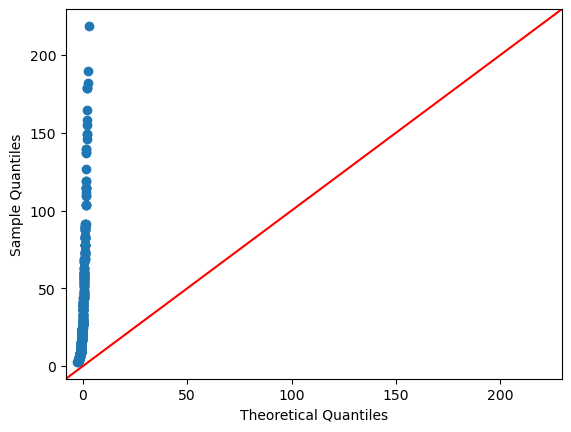

In [109]:
import statsmodels.api as sm
import pylab
data_points = data_2021['Sales']
sm.qqplot(data_points, line = '45')
pylab.show()

### Observations from the Q-Q Plot

The data points in the Q-Q plot deviate noticeably from the red diagonal line, especially in the higher quantiles (right side of the plot). This indicates that the data does not follow a normal distribution.


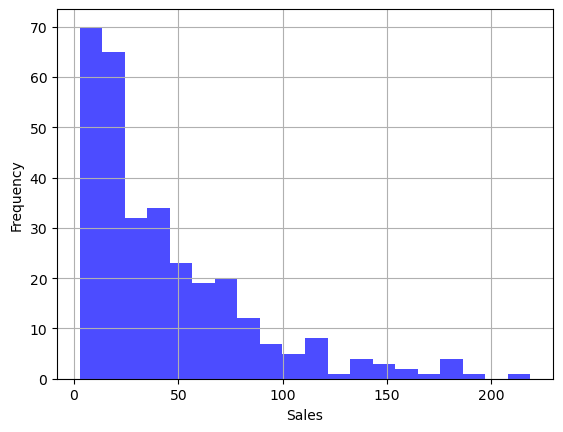

In [208]:
import matplotlib.pyplot as plt

sale_2021 = data_2021['Sales']
sale_2021.hist(bins =20,color = 'blue', alpha = 0.7)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

Ok, it's a right skewed data distribution for 2021, okay let's check for other groups as well

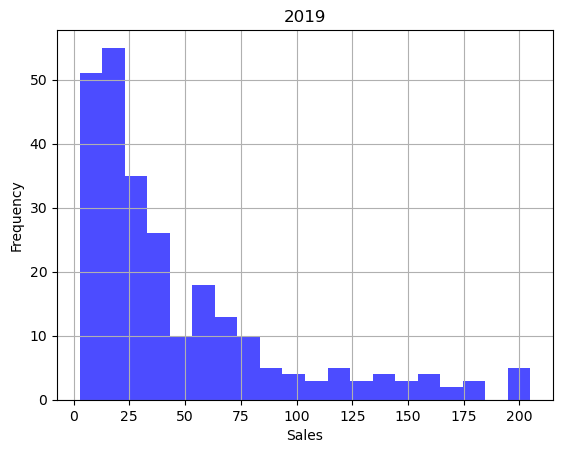

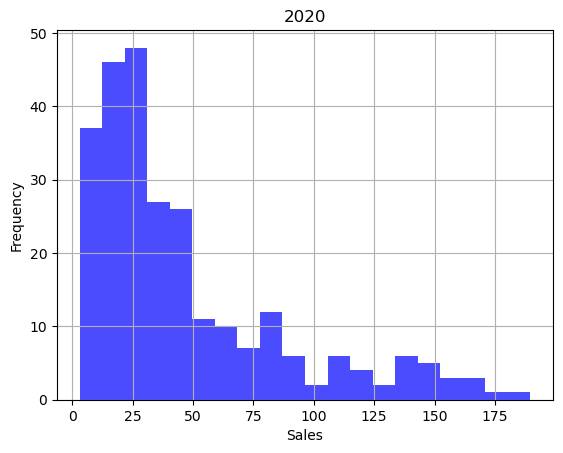

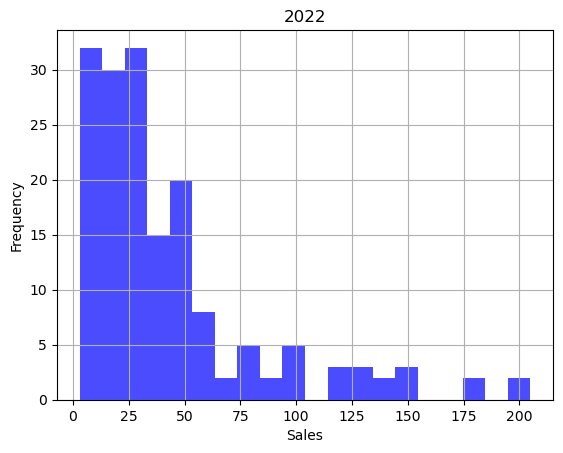

In [204]:
def plot_histogram_for_sales_data(start_date, end_date):
    start_date = datetime.strptime(start_date, '%Y-%m-%d').date()
    end_date = datetime.strptime(end_date, '%Y-%m-%d').date()
    data_for_the_year = df[(df['Order Date'] >= start_date) & (df['Order Date'] <= end_date)]
    sale = data_for_the_year['Sales']
    sale.hist(bins =20,color = 'blue', alpha = 0.7)
    plt.xlabel('Sales')
    plt.ylabel('Frequency')
    plt.title(start_date.year)
    plt.show()

plot_histogram_for_sales_data('2019-01-01', '2019-12-31')
plot_histogram_for_sales_data('2020-01-01', '2020-12-31')
plot_histogram_for_sales_data('2022-01-01', '2022-12-31')

### Skewness in Distribution

All four years (2019, 2020, 2021, and 2022) exhibit a right-skewed distribution. At this stage, we have two options:  
1. Opt for non-parametric tests.  
2. Transform the data to meet normality assumptions.  

Let's take the challenging route and transform the data to ensure it aligns with the assumptions for ANOVA.


2      2.561096
3      3.314186
4      4.006788
5      3.659708
10     3.683867
         ...   
987    3.396185
992    4.694737
993    4.352855
994    2.192770
998    2.297573
Name: Sales, Length: 312, dtype: float64


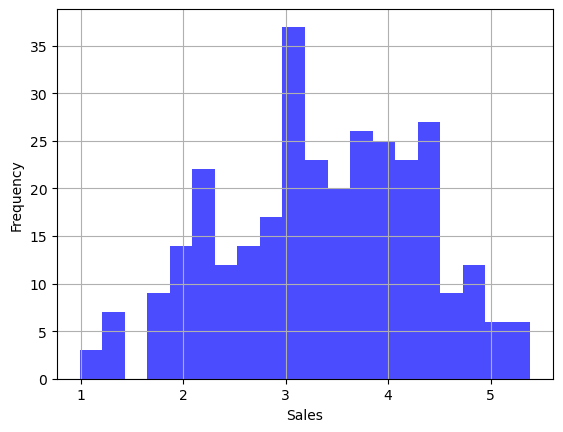

In [136]:
import numpy as np
sale_2021 = sale_2021.apply(np.log)
print(log_df)
sale_2021.hist(bins =20,color = 'blue', alpha = 0.7)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

### Post-Transformation: Observing Normality

Wow! A normal distribution :)  
Okay, it’s not a perfectly symmetrical bell curve, but it’s close enough—something is better than nothing!  

Now, let’s check the results using our trusty Q-Q plot.

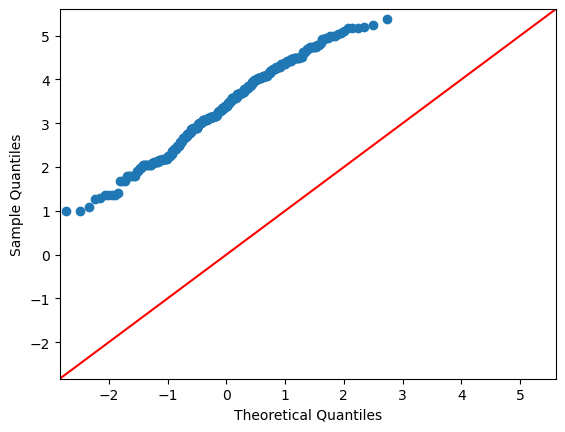

In [138]:
sm.qqplot(sale_2021, line = '45')
pylab.show()

### Additional Considerations for Informed Decision-Making

To make a more informed decision, it’s important to evaluate the following:  
1. **Sample Size:**  
   What is the size of your sample for each group?  

2. **Pattern Consistency:**  
   Are the other groups in your analysis showing similar patterns?  

3. **Group Size Equality:**  
   Are the group sizes approximately equal across the years being analyzed?  


In [188]:
def return_specific_years_sales_data(start_date, end_date):
    start_date = datetime.strptime(start_date, '%Y-%m-%d').date()
    end_date = datetime.strptime(end_date, '%Y-%m-%d').date()
    data_for_the_year = df[(df['Order Date'] >= start_date) & (df['Order Date'] <= end_date)]
    return data_for_the_year
sale_for_2019 = return_specific_years_sales_data('2019-01-01','2019-12-31')
print('Sample size of 2019 Group 1 =',len(sale_for_2019))

sale_for_2020 = return_specific_years_sales_data('2020-01-01','2020-12-31')
print('Sample size of 2020 Group 2 =',len(sale_for_2020))

sale_for_2021 = return_specific_years_sales_data('2021-01-01','2021-12-31')
print('Sample size of 2019 Group 3 =',len(sale_for_2021))

sale_for_2020 = return_specific_years_sales_data('2022-01-01','2022-12-31')
print('Sample size of 2019 Group 4 =',len(sale_for_2020))

Sample size of 2019 Group 1 = 259
Sample size of 2020 Group 2 = 263
Sample size of 2019 Group 3 = 312
Sample size of 2019 Group 4 = 166


### Justification for Proceeding with ANOVA

Based on the available information and the Q-Q plot, you can proceed with ANOVA for the following reasons:  

1. **Large Sample Sizes:**  
   All groups have \( n > 30 \), allowing the Central Limit Theorem to apply. This makes ANOVA more robust to minor deviations from normality.  

2. **Moderate Size Differences:**  
   - While Group 4 is smaller, ANOVA can handle some imbalance in group sizes.  
   - This is supported by:  
     - The overall sample sizes being large.  
     - The ratio between the largest group (312) and the smallest group (166) being less than 2:1.  

### Final Check: Homogeneity of Variances

To proceed, we need to perform one last check—**Levene's Test**—to verify the homogeneity of variances:  

- **Null Hypothesis (H₀):** The variances between groups are equal.  
- **Alternative Hypothesis (H₁):** The variances between groups are not equal.  


In [190]:
from scipy import stats
res = stats.levene(sale_for_2019['Sales'], sale_for_2020['Sales'], sale_for_2021['Sales'], sale_for_2022['Sales'])
print('levene statistic',res.statistic)
print('levene pvalue',res.pvalue)

levene statistic 0.9827113713452164
levene pvalue 0.4002812457995143


So far combining the results that we obtain so far, we can move forward with the ANOVA test, because of the following:
Normality (adequately met)
Independence (assumed from your sampling)
Homogeneity of variances (confirmed by Levene's test)

In [192]:
from scipy.stats import f_oneway
f_oneway(sale_for_2019['Sales'], sale_for_2020['Sales'], sale_for_2021['Sales'], sale_for_2022['Sales'])


F_onewayResult(statistic=0.5598904988894127, pvalue=0.6416297947191938)

### One-Way ANOVA Results

**F statistic:** 0.488  
**p - value:** 0.690 (which is > 0.05)  

### Interpretation  

Since the p-value (0.690) is greater than the typical significance level of 0.05, we fail to reject the null hypothesis. This indicates:  

1. **No Statistically Significant Differences:**  
   The means of the groups (2019, 2020, 2021, and 2022) are not statistically different.  

2. **Random Variation:**  
   Any observed differences between the groups can be attributed to random chance.  

3. **Year-to-Year Variation:**  
   The variation across the years is not meaningful from a statistical perspective.  

4. **Small Effect Size:**  
   The low F-statistic (0.488) suggests a minimal effect size.  

### Conclusion  

Given these results, there were no significant differences in the measured variable across the four years (2019 - 2022), So our null hypothesis is true that is the sales increase from July to August in 2021 is not statistically significant and occurred by random chance..
